The main focus of this notebook is to preprocess a dataset to prepare it for the application of machine learning algorithms and fairness evaluation. The notebook also includes visualizations and statistics to help understand the distribution and correlations of the data.

**PLEASE NOTE**: The notebook must be configured with a dataset and some configuration variables.  
The ***protected attributes*** must be categorical and binary (0,1), but the original column must be mantained as a continuous variable.

# Library

In order to run this notebook in Google Colab, you have to:
1. Upload the project folder to your Google Drive
2. Mount your Google Drive in the next code cell
3. Update the `path_to_project` variable, with the path to the project folder in your Google Drive (e.g. `path_to_project = '/content/drive/MyDrive/Colab/project'`), this can be seen from the file tab on the left of the Colab interface
4. Update the pip installation command  (e.g. `!pip install -r /content/drive/MyDrive/Colab/project/requirements.txt`)

In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  import sys
  path_to_project = '/content/drive/MyDrive/FairAlgorithm'
  sys.path.append(path_to_project)
  !sudo apt install libcairo2-dev pkg-config python3-dev
  IN_COLAB = True
except:
  IN_COLAB = False

Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev
  libglib2.0-dev libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev
  libmount1 libpixman-1-dev libselinux1-dev libsepol-dev libsm-dev
  libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libice-doc cryptsetup-bin libsm-doc
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 

In [2]:
import numpy as np
import pandas as pd
import plotly
np.random.seed(0)
from rich import print
from rich.columns import Columns
from rich.panel import Panel
from rich.align import Align
from source.utils.print_util import *
from source.utils.data_preprocessing import *
import matplotlib.pyplot as plt

## Configuration

In the next code cell, set all the variables that are used throughout the notebook.  
The variables are used to configure the notebook, and to set the paths to the data files.

Modify the variables in the next code cell to configure the notebook
- `dataset_path`: The path to the dataset file.
- `Y`: The target feature to predict.
- `Y_labels`: The labels for the target feature.

In [3]:
dataset_path = path_to_project + '/data/raw/sepsis.csv' if IN_COLAB else 'data/raw/sepsis.csv'
Y = 'Mortality'
Y_labels = 'Survived','Death'

## Data load and exploration


Data is loaded from the file specified in the `dataset_path` variable using the `pandas` library.  
[pandas](https://pandas.pydata.org) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

In [4]:
df = pd.read_csv(dataset_path)
df.columns.tolist()

['Age',
 'Gender',
 'Diagnosis',
 'APACHE II',
 'SOFA',
 'CRP',
 'WBCC',
 'NeuC',
 'LymC',
 'EOC',
 'NLCR',
 'PLTC',
 'MPV',
 'Group',
 'LOS-ICU',
 'Mortality']

In [5]:
df.head(6)

,Age,Gender,Diagnosis,APACHE II,SOFA,CRP,WBCC,NeuC,LymC,EOC,NLCR,PLTC,MPV,Group,LOS-ICU,Mortality
0,46,E,M,16,0,0.18,12.22,10.53,0.980,50,10.744898,164,9.7,0,7,0
1,46,E,M,7,0,0.15,14.92,11.91,2.120,10,5.617925,241,9.4,0,1,0
2,33,K,M,32,10,39.19,0.60,0.20,0.005,0,40.000000,14,8.9,1,54,1
3,76,E,M,25,4,17.81,14.82,13.49,2.800,20,4.817857,282,9.0,0,3,0
4,65,E,EC,14,0,27.55,8.18,7.15,0.410,40,17.439024,152,11.6,0,2,0
5,80,E,M,15,1,2.12,15.40,12.59,1.280,20,9.835938,280,11.0,1,1,0


**Columns transformation**

Transform columns with continuous attribute values, or categorical attributes expressed by strings, into categorical attributes expressed by numbers and booleans (0, 1).

In [6]:
#gender
gender_mapping = {'K': 0, 'E': 1}  ## E male, K female
df["Gender_cat"] = df["Gender"].map(gender_mapping)

As indicated in the paper, https://journals.plos.org/digitalhealth/article?id=10.1371/journal.pdig.0000459#sec006, the median of the age of the patiences in this dataset is 63 for the septis cohort.

In [7]:
#age
df['Age_cat'] = df['Age'].values
samples = df.shape[0]

# 63 is the median
i = 0
while i<samples:
    if df['Age'][i] < 63:
        df.loc[i, 'Age_cat'] = 0

    else:
       df.loc[i, 'Age_cat'] = 1

    i = i+1


Label encoding for diagnosis.

In [8]:
#diagnosis
diagnosis_mapping = {'EC': 0, 'M': 1, 'AC': 2}
df["Diagnosis_cat"] = df["Diagnosis"].map(diagnosis_mapping)

In [9]:
df.head(6)

,Age,Gender,Diagnosis,APACHE II,SOFA,CRP,WBCC,NeuC,LymC,EOC,NLCR,PLTC,MPV,Group,LOS-ICU,Mortality,Gender_cat,Age_cat,Diagnosis_cat
0,46,E,M,16,0,0.18,12.22,10.53,0.980,50,10.744898,164,9.7,0,7,0,1.0,0,1.0
1,46,E,M,7,0,0.15,14.92,11.91,2.120,10,5.617925,241,9.4,0,1,0,1.0,0,1.0
2,33,K,M,32,10,39.19,0.60,0.20,0.005,0,40.000000,14,8.9,1,54,1,0.0,0,1.0
3,76,E,M,25,4,17.81,14.82,13.49,2.800,20,4.817857,282,9.0,0,3,0,1.0,1,1.0
4,65,E,EC,14,0,27.55,8.18,7.15,0.410,40,17.439024,152,11.6,0,2,0,1.0,1,0.0
5,80,E,M,15,1,2.12,15.40,12.59,1.280,20,9.835938,280,11.0,1,1,0,1.0,1,1.0


**Check for missing values**

Missing values in a dataset can introduce bias, reduce accuracy, limit the types of analyses that can be performed, and increase the complexity of analysis. Therefore, it is generally advisable to remove missing values from a dataset, as long as the amount of missing data is not too large. However, the reasons for the missing values should be carefully considered, and in some cases, imputation or specialized methods for handling missing data may be more appropriate.  

`remove_missing_values` function is used to remove rows with missing values.  

In [10]:
print(df.shape)
df[df.isna().any(axis=1)]

(1257, 19)

,Age,Gender,Diagnosis,APACHE II,SOFA,CRP,WBCC,NeuC,LymC,EOC,NLCR,PLTC,MPV,Group,LOS-ICU,Mortality,Gender_cat,Age_cat,Diagnosis_cat
159,50,E,NaN,5,1,6.53,11.58,9.87,0.9,0,10.966667,191,9.6,0,1,0,1.0,0,NaN
697,32,NaN,AC,15,5,1.40,9.90,5.60,1.7,10,3.294118,200,9.0,0,4,0,NaN,0,2.0


In [11]:
df = remove_missing_values(df)

╭─────────────────────────────────────────── Searching missing values ────────────────────────────────────────────╮
│                                                                                                                 │
╰───────────────────────────────────────  MISSING VALUES FOUND AND REMOVED ───────────────────────────────────────╯

In [12]:
df.shape

(1255, 19)

**Check for outliers**

Outliers are data points that deviate significantly from other data points in a dataset, and they can introduce bias, reduce accuracy, lead to misleading results, and increase the complexity of analysis. Outliers are generally considered bad for statistical analysis, and it is important to identify and handle them appropriately to ensure the accuracy and reliability of statistical models and analysis.

First we plot the dataset using a **box plot**, if some attribute has any point outside the box, it means that it has an outlier. We then use these attributes and **IQR** to remove the outliers.

In the plot, some features of this dataset resulted to have a very big amount of outliers: CRP has 107 outliers, EOC has 114 and LOS-ICU has 84 of them. After an analisys of how important those features are in the correlation matrix, we decided to drop the features CRP and EOC. Respectively, we have that CRP has a value of 0.024 on the heat map, EOC has 0.081 and LOS-IC has an importance of 0.19. The first two features result to have a very low impact on the output and therefore can be dropped.

In [13]:
df = df.drop(['CRP', 'EOC'], axis=1)
df.head(6)

,Age,Gender,Diagnosis,APACHE II,SOFA,WBCC,NeuC,LymC,NLCR,PLTC,MPV,Group,LOS-ICU,Mortality,Gender_cat,Age_cat,Diagnosis_cat
0,46,E,M,16,0,12.22,10.53,0.980,10.744898,164,9.7,0,7,0,1.0,0,1.0
1,46,E,M,7,0,14.92,11.91,2.120,5.617925,241,9.4,0,1,0,1.0,0,1.0
2,33,K,M,32,10,0.60,0.20,0.005,40.000000,14,8.9,1,54,1,0.0,0,1.0
3,76,E,M,25,4,14.82,13.49,2.800,4.817857,282,9.0,0,3,0,1.0,1,1.0
4,65,E,EC,14,0,8.18,7.15,0.410,17.439024,152,11.6,0,2,0,1.0,1,0.0
5,80,E,M,15,1,15.40,12.59,1.280,9.835938,280,11.0,1,1,0,1.0,1,1.0


In [14]:
df.shape

(1255, 17)

In [15]:
fig = plotly.boxplot_frame(df, y=['Age','APACHE II','SOFA','WBCC','NeuC','LymC', 'NLCR','PLTC','MPV','Group','LOS-ICU'])
fig.show()

In [16]:
# From the plot, these attributes need further investigation on outliers, so we will use the IQR method to find and remove them
attributes = ['APACHE II','SOFA','WBCC','NeuC','LymC', 'NLCR','PLTC','MPV','LOS-ICU']
df = search_and_remove_outliers(df, attributes)

╭─ Searching outliers for the following attributes: ['APACHE II', 'SOFA', 'WBCC', 'NeuC', 'LymC', 'NLCR', 'PLTC',─╮
│                         ┏━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓                         │
│                         ┃ Attribute ┃ # Outliers ┃   MAX Outlier    ┃   MIN Outlier   ┃                         │
│                         ┡━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩                         │
│                         │ APACHE II │     18     │        48        │       35        │                         │
│                         │   SOFA    │     39     │        16        │       11        │                         │
│                         │   WBCC    │     28     │      51.08       │      25.9       │                         │
│                         │   NeuC    │     5      │      23.14       │      22.15      │                         │
│                         │   LymC    │     52     │       5.54       │      2.34       │                         │
│                         │   NLCR    │     54     │ 106.090909090909 │ 27.921568627451 │                         │
│                         │   PLTC    │     34     │       750        │       419       │                         │
│                         │    MPV    │     17     │      107.0       │       0.0       │                         │
│                         │  LOS-ICU  │    130     │        96        │        7        │                         │
│                         └───────────┴────────────┴──────────────────┴─────────────────┘                         │
╰─────────────────────────────────────────────── OUTLIERS REMOVED ────────────────────────────────────────────────╯

In [17]:
df.shape

(878, 17)

**Feature selection**

Feature selection is a process of identifying the most important and relevant features or variables that contribute the most to a predictive model. It is a crucial step in data preprocessing and analysis, and it helps to improve the accuracy, efficiency, and interpretability of the model.

The correlation matrix is plotted to identify the most correlated attributes. In this case no attribute can be removed since no value is above 0.7.

In [18]:
df_category = df[['Gender_cat', 'Age_cat', 'APACHE II','SOFA','WBCC','NeuC','LymC','NLCR','PLTC','MPV','Group','LOS-ICU', 'Mortality']].copy()
df_category.head(6)

,Gender_cat,Age_cat,APACHE II,SOFA,WBCC,NeuC,LymC,NLCR,PLTC,MPV,Group,LOS-ICU,Mortality
1,1.0,0,7,0,14.92,11.91,2.12,5.617925,241,9.4,0,1,0
4,1.0,1,14,0,8.18,7.15,0.41,17.439024,152,11.6,0,2,0
5,1.0,1,15,1,15.40,12.59,1.28,9.835938,280,11.0,1,1,0
6,1.0,0,14,0,10.48,8.66,1.22,7.098361,176,10.0,0,1,0
7,1.0,0,10,3,19.16,16.28,0.62,26.258065,280,10.8,0,1,0
8,1.0,1,11,0,15.31,13.58,1.20,11.316667,177,10.9,0,1,0


In [19]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 1 to 1256
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender_cat  878 non-null    float64
 1   Age_cat     878 non-null    int64  
 2   APACHE II   878 non-null    int64  
 3   SOFA        878 non-null    int64  
 4   WBCC        878 non-null    float64
 5   NeuC        878 non-null    float64
 6   LymC        878 non-null    float64
 7   NLCR        878 non-null    float64
 8   PLTC        878 non-null    int64  
 9   MPV         878 non-null    float64
 10  Group       878 non-null    int64  
 11  LOS-ICU     878 non-null    int64  
 12  Mortality   878 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 96.0 KB


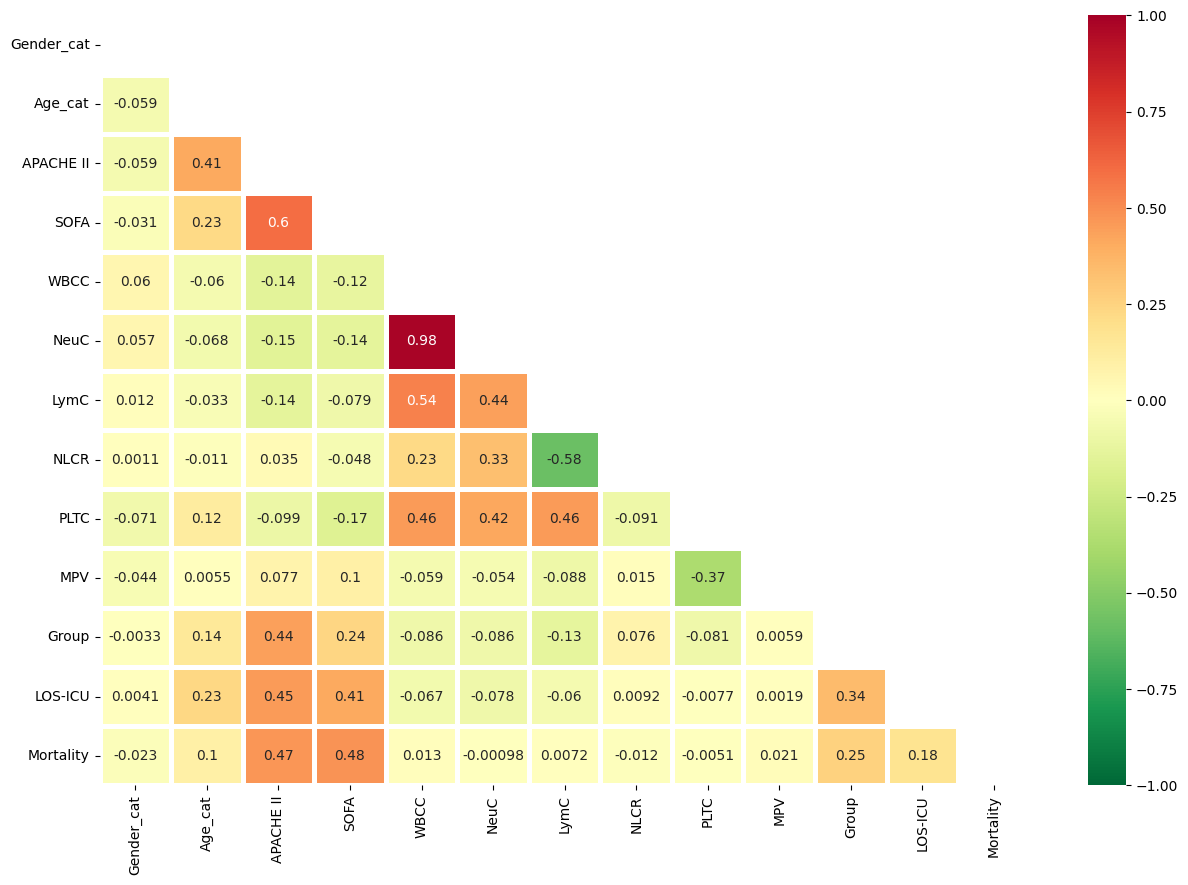

In [20]:
correlation_matrix = df_category.corr()
top_corr_features = correlation_matrix.index
print_heatmap(df_category[top_corr_features].corr())

## Visualisation


A first interesting aspect is to plot the target variable distribution, in order to have a general view of the outcome.  
From the plot we can see the distribution of the target variable.

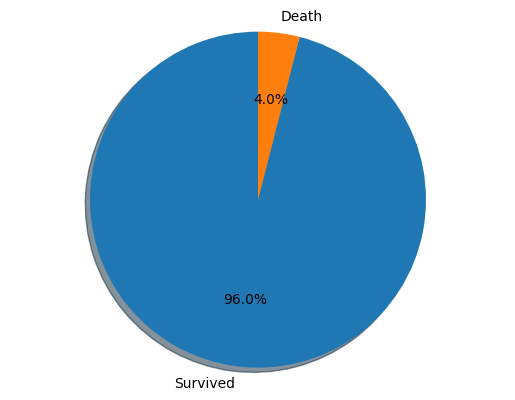

In [21]:
size0, size1 = df[Y].value_counts()
sizes = [size0, size1]
explode = (0, 0)
fig1, ax1= plt.subplots()
ax1.pie(sizes,explode=explode,labels=Y_labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()


**Plot Protected Attributes**

Name mapping for the sensible attribute

It is possible to decide how to map the sensible attribute values to the labels, as shown in the next code cell, by modifying the `sensible_attribute_map` dictionary.

`G` is the list of sensible attributes to use for bias mitigation.

In [22]:
G = ['Gender_cat','Age_cat']

In [23]:
gender_attribute_map = {
    0: "Female",
    1: "Male",
}

In [24]:
age_attribute_map = {
    1: "Adult",
    0: "Young",
}

In [25]:
sensible_attribute_map = {
    'Age_cat': age_attribute_map,
    'Gender_cat': gender_attribute_map
}

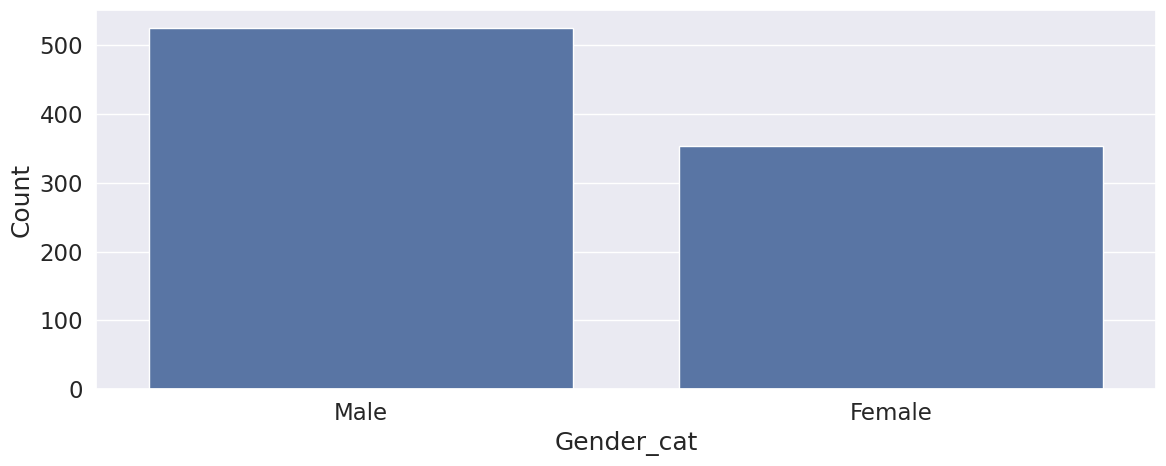

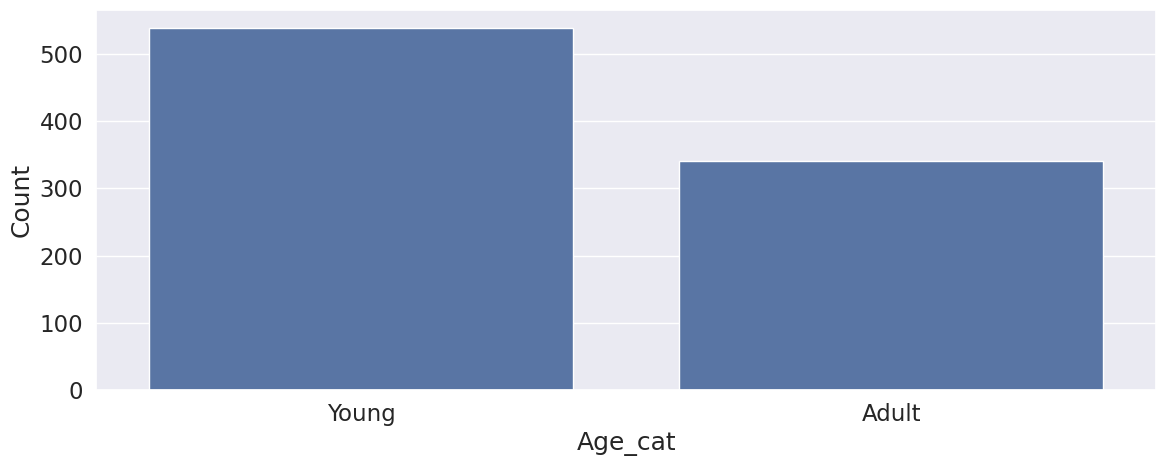

In [26]:
df_copy = df.copy()
for attribute in G:
    df_copy[attribute] = df_copy[attribute].map(sensible_attribute_map[attribute])
    visualize_att_dist(df_copy, attribute, _category=True)

# Statistics on the preprocessed data
Information about the dataset.

Percentage of samples for each protected attribute and the target.

In [27]:
samples = df.shape[0]

In [28]:
#gender
gender_zero = df[df['Gender_cat'] == 0]
count_gender_zero = len(gender_zero)
print(f"percentage of samples with gender = 0 (female) : {count_gender_zero/samples}")

gender_one = df[df['Gender_cat'] == 1]
count_gender_one = len(gender_one)
print(f"percentage of samples with gender = 1 (male): {count_gender_one/samples}")


percentage of samples with gender = 0 (female) : 0.4020501138952164

percentage of samples with gender = 1 (male): 0.5979498861047836

In [29]:
#age
age_zero = df[df['Age_cat'] == 0]
count_age_zero = len(age_zero)
print(f"percentage of samples with age = 0 (<63): {count_age_zero/samples}")

age_one = df[df['Age_cat'] == 1]
count_age_one = len(age_one)
print(f"percentage of samples with age = 1 (>= 63): {count_age_one/samples}")


percentage of samples with age = 0 (<63): 0.6127562642369021

percentage of samples with age = 1 (>= 63): 0.38724373576309795

In [30]:
#mortality, target
mortality_counts = df['Mortality'].value_counts()
print(f"number of samples per mortality: {mortality_counts}")
print(f"percentage of samples per mortality: {mortality_counts /samples}")


number of samples per mortality: Mortality
0    843
1     35
Name: count, dtype: int64

percentage of samples per mortality: Mortality
0    0.960137
1    0.039863
Name: count, dtype: float64

Percentage of samples for each protected attribute value and for each value of target class.

In [31]:
#gender
filtered_samples = df[(df['Gender_cat'] == 0) & (df['Mortality'] == 0)]
count_filtered_samples = len(filtered_samples)
print(f"Percentage of samples where mortality = 0 given gender = 0 (female): {count_filtered_samples/count_gender_zero}")

filtered_samples = df[(df['Gender_cat'] == 0) & (df['Mortality'] == 1)]
count_filtered_samples = len(filtered_samples)
print(f"Percentage of samples where mortality = 1 given gender = 0 (female): {count_filtered_samples/count_gender_zero}")

filtered_samples = df[(df['Gender_cat'] == 1) & (df['Mortality'] == 0)]
count_filtered_samples = len(filtered_samples)
print(f"Percentage of samples where mortality = 0 given gender = 1 (male): {count_filtered_samples/count_gender_one}")

filtered_samples = df[(df['Gender_cat'] == 1) & (df['Mortality'] == 1)]
count_filtered_samples = len(filtered_samples)
print(f"Percentage of samples where mortality = 1 given gender = 1 (male): {count_filtered_samples/count_gender_one}")


Percentage of samples where mortality = 0 given gender = 0 (female): 0.9546742209631728

Percentage of samples where mortality = 1 given gender = 0 (female): 0.0453257790368272

Percentage of samples where mortality = 0 given gender = 1 (male): 0.9638095238095238

Percentage of samples where mortality = 1 given gender = 1 (male): 0.03619047619047619

In [32]:
#age
filtered_samples = df[(df['Age_cat'] == 0) & (df['Mortality'] == 0)]
count_filtered_samples = len(filtered_samples)
print(f"Percentage of samples where mortality = 0 given age = 0 (< 63): {count_filtered_samples/count_age_zero}")

filtered_samples = df[(df['Age_cat'] == 0) & (df['Mortality'] == 1)]
count_filtered_samples = len(filtered_samples)
print(f"Percentage of samples where mortality = 1 given age = 0 (< 63): {count_filtered_samples/count_age_zero}")

filtered_samples = df[(df['Age_cat'] == 1) & (df['Mortality'] == 0)]
count_filtered_samples = len(filtered_samples)
print(f"Percentage of samples where mortality = 0 given age = 1 (>= 63): {count_filtered_samples/count_age_one}")

filtered_samples = df[(df['Age_cat'] == 1) & (df['Mortality'] == 1)]
count_filtered_samples = len(filtered_samples)
print(f"Percentage of samples where mortality = 1 given age = 1 (>= 63): {count_filtered_samples/count_age_one}")


Percentage of samples where mortality = 0 given age = 0 (< 63): 0.9758364312267658

Percentage of samples where mortality = 1 given age = 0 (< 63): 0.024163568773234202

Percentage of samples where mortality = 0 given age = 1 (>= 63): 0.9352941176470588

Percentage of samples where mortality = 1 given age = 1 (>= 63): 0.06470588235294118

## Save preprocessed dataset

In [33]:
saving_path = path_to_project + '/data/preprocessed/preprocessed-sepsis.csv' if IN_COLAB else 'data/preprocessed/preprocessed-sepsis.csv'
df_category.to_csv(saving_path, sep=',', index=False, encoding='utf-8')